<h1>C964 Capstone Project</h1>

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widget
import os
import glob
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


path = os.getcwd()
csvfiles = glob.glob(os.path.join(path, "data/*.csv"))

df = None
def dropdownFunc(Stock):
    for file in csvfiles:
        if Stock in file:
            return file

dropdown = widget.interactive(dropdownFunc, Stock=['AAPL', 'AMD', 'AMZN', 'ATVI', 'BABA', 'BAC', 'CRM', 'CSCO', 'DIS', 'EA', 'F', 'GOOG', 'INTC', 'JPM', 'KO', 'MCD', 'META', 'MSFT', 'MTCH', 'NFLX', 'NVDA', 'PFE', 'PYPL', 'T', 'TSLA','TTD','WMT','XOM','YELP','ZG'])
display(dropdown)


interactive(children=(Dropdown(description='Stock', options=('AAPL', 'AMD', 'AMZN', 'ATVI', 'BABA', 'BAC', 'CR…

<p style="font-size: larger">Use the combo box above to select the stock you are interested in analyzing.

</p>

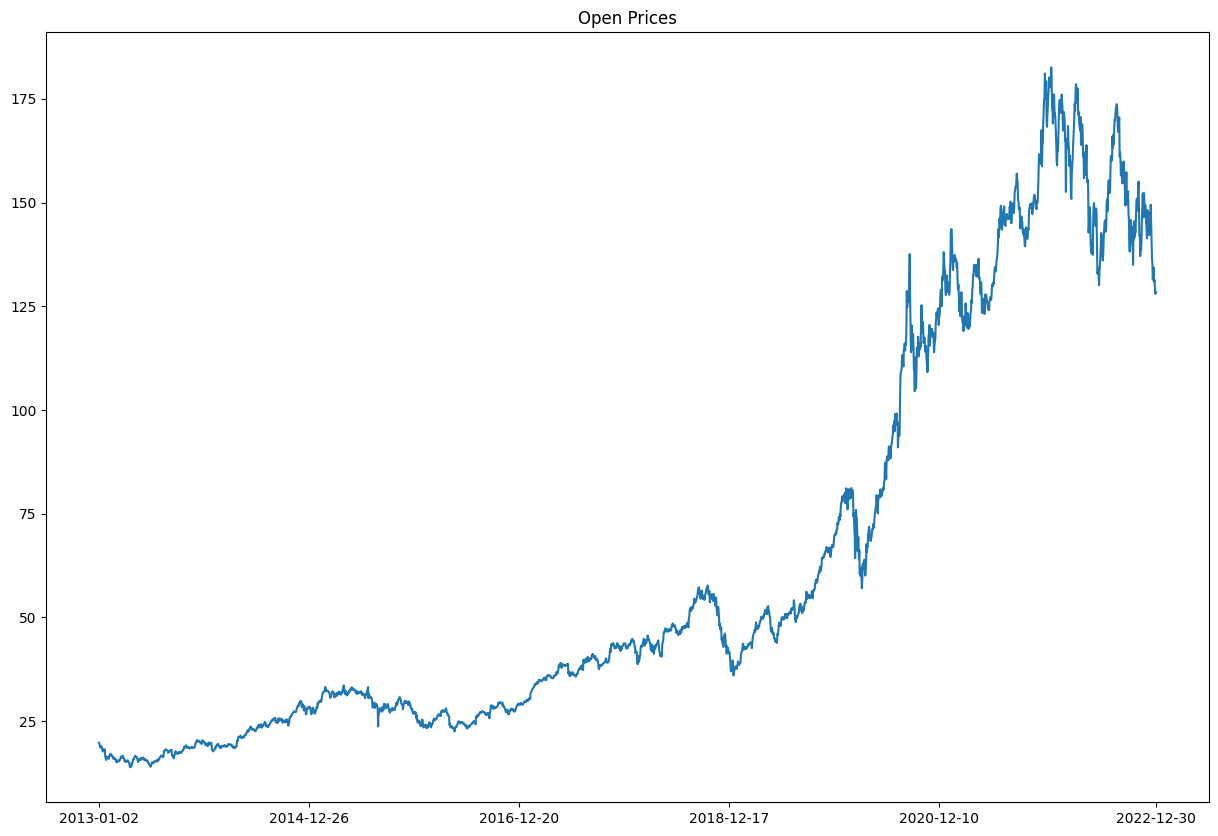

In [2]:

df = pd.read_csv(dropdown.result)
openValues = df.Open
closeValues = df.Close
dates = df.Date
plt.figure(figsize=(15,10))
plt.plot(dates, df.Open)
plt.xticks([0, 500, 1000, 1500, 2000, 2517])
plt.title("Open Prices")
plt.savefig("open_prices.jpg")
plt.show()
plt.close()



Above we simply plotted the open prices of the stock. Below we will split the data into our training data and our test data.

In [3]:
training_data = df[:2265]
test_data = df[2265:]

open_training = training_data.iloc[:,1:2].values
open_test = test_data.iloc[:,1:2].values

sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(open_training)

x_train = []
y_train = []

for i in range (60,2265):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(2205, 60, 1)
